<a href="https://colab.research.google.com/github/qiumic000/fastai/blob/master/bearwidget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 720 kB 3.1 MB/s 
     |████████████████████████████████| 189 kB 58.1 MB/s 
     |████████████████████████████████| 1.2 MB 47.8 MB/s 
     |████████████████████████████████| 48 kB 3.9 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 558 kB 42.8 MB/s 
     |████████████████████████████████| 51 kB 211 kB/s 
     |████████████████████████████████| 130 kB 52.6 MB/s 
Mounted at /content/gdrive


In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '60f8c68cc3364a91bc2512ea1fa49aaf')
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [4]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [5]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

In [6]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = bears.dataloaders(path)
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
learn = cnn_learner(dls, resnet18, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [7]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.679296,0.419671,0.129412,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.294730,0.101042,0.023529,01:03
1,0.200229,0.075639,0.023529,01:03
2,0.148665,0.059720,0.023529,01:02
3,0.114739,0.061370,0.035294,01:01


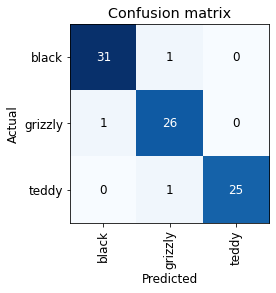

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
path = Path()
learn_inf = load_learner(path/'export.pkl')
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description = "Classify")
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
out_pl = widgets.Output()
out_pl.clear_output()
btn_upload


FileUpload(value={}, description='Upload')

In [20]:
img = PILImage.create(btn_upload.data[-1])

with out_pl: display(img.to_thumb(128,128))
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [21]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.7 MB 3.2 MB/s 
     |████████████████████████████████| 397 kB 42.9 MB/s 
     |████████████████████████████████| 61 kB 6.5 MB/s 
     |████████████████████████████████| 111 kB 62.2 MB/s 
     |████████████████████████████████| 428 kB 57.8 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
